## 특성 스케일링(feature scaling)
- 데이터 스케일링(data scaling)이라고도 함
- 하는 이유 : 데이터값의 범위가 다 제각각이기 때문에 범위 차이가 클 경우 데이터를 갖고 모델을 학습할 때 0으로 수렴하거나 무한으로 발산할 수 있음
- 특성들의 단위를 무시할 수 있도록, 특성들의 값의 범위를 비슷하게 만들어줌  
[정규화, 표준화 참고](https://bskyvision.com/849)


## MinMaxScaling (정규화; normalization) 

- column 간에 다른 **min**, **max** 값을 가지는 경우, 정규화를 통해 최소치 0 / 최대값 1의 척도로 맞추어 주는 것  
X' = (X - Xmin) / (Xmax - Xmin)

- 이상치가 존재한다면, 이상치가 극값이 되어 데이터가 아주 좁은 범위에 분포하게 되기 때문에 스케일링 방법으로 적절하지 않음
* 넷플릭스 영화평점 (0점 ~ 10점): [2, 4, 6, 8, 10]
* CGV 영화평점 (0점 ~ 5점): [1, 2, 3, 4, 5]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
movie = {
         'netflix': [2, 4, 6, 8, 10], 
         'cgv': [1, 2, 3, 4, 5]
         }

In [20]:
movie = pd.DataFrame(data=movie)
movie

,netflix,cgv
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mms = MinMaxScaler()

In [23]:
mms.fit(movie)

MinMaxScaler()

In [24]:
mmsed = mms.transform(movie)

In [25]:
mmsed

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [26]:
pd.DataFrame(mmsed, columns=['naver', 'netflix'])

,naver,netflix
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


## StandardScaling (표준화; standardization)

X' = (X - μ)/σ   
 μ : 특성의 평균 값
 σ : 표준편차
- 종모양의 분포를 따른다고 가정하고 값들을 평균 0, 표준편차 1인 정규분포를 갖도록 변환해줌. 
- 표준화를 해주면 정규화처럼 특성값의 범위가 0과 1의 범위로 균일하게 바뀌지는 않음
- 데이터 내에 이상치가 있다면 데이터의 평균과 분산에 크게 영향을 주기 때문에 스케일링 방법으로 적절하지 않음
- scale의 범위가 너무 크면 노이즈 데이터가 생성되거나 overfitting이 될 가능성이 높아짐 

In [33]:
from sklearn.preprocessing import StandardScaler

샘플 데이터 생성

In [28]:
x = np.arange(10)
# outlier 추가
x[9] = 1000

In [29]:
x.mean(), x.std()

(103.6, 298.8100399919654)

In [30]:
x=x.reshape(-1,1)
x # 1열로 되어 있는 2차원으로 형태조정

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [   7],
       [   8],
       [1000]])

In [31]:
#pd.Series(x)
pd.DataFrame(x)

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,1000


In [34]:
standard_scaler = StandardScaler()

In [35]:
scaled = standard_scaler.fit_transform(x)

In [36]:
x.mean(), x.std()

(103.6, 298.8100399919654)

In [37]:
scaled.mean(), scaled.std()

(4.4408920985006264e-17, 1.0)

In [38]:
round(scaled.mean(), 2), scaled.std()

(0.0, 1.0)

## RobustScaler

- RobustScaler는 StandardScaler와 비슷함
- StandardScaler는 평균과 분산을 사용했지만 RobustScaler는 중간값(median)과 사분위값(quartile)을 사용함
- 이상치의 영향을 최소화할 수 있음

In [39]:
from sklearn.preprocessing import RobustScaler

In [40]:
rbs = RobustScaler()
rbs.fit(movie)
rbsed = rbs.transform(movie)

In [41]:
rbsed

array([[-1. , -1. ],
       [-0.5, -0.5],
       [ 0. ,  0. ],
       [ 0.5,  0.5],
       [ 1. ,  1. ]])

In [42]:
pd.DataFrame(rbsed, columns=['naver', 'netflix'])

,naver,netflix
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,1.0,1.0


## MaxAbsScaler

- MinMaxScaler와 비슷함
- 모든 피처들의 절댓값이 0과 1 사이에 놓이도록 만들어줌
- 0을 기준으로 절댓값이 가장 큰 수가 1또는 -1의 값을 가지게 됨
- 이상치의 영향을 크게 받기 때문에 이상치가 존재할 경우 이 방법은 적절하지 않음

In [44]:
from sklearn.preprocessing import MaxAbsScaler

In [45]:
mas = MaxAbsScaler()
mas.fit(movie)
mased = mas.transform(movie)

In [46]:
mased

array([[0.2, 0.2],
       [0.4, 0.4],
       [0.6, 0.6],
       [0.8, 0.8],
       [1. , 1. ]])

In [47]:
pd.DataFrame(mased, columns=['naver', 'netflix'])

,naver,netflix
0,0.2,0.2
1,0.4,0.4
2,0.6,0.6
3,0.8,0.8
4,1.0,1.0


## Normalizer

- 각 행(row)마다 정규화가 진행
- 한 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 데이터값을 만들어줌
- 좀 더 빠르게 학습할 수 있고 과대적합 확률을 낮출 수 있음

In [48]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
norm.fit(movie)
normed = norm.transform(movie)

In [49]:
normed

array([[0.89442719, 0.4472136 ],
       [0.89442719, 0.4472136 ],
       [0.89442719, 0.4472136 ],
       [0.89442719, 0.4472136 ],
       [0.89442719, 0.4472136 ]])

In [50]:
pd.DataFrame(normed, columns=['naver', 'netflix'])

,naver,netflix
0,0.894427,0.447214
1,0.894427,0.447214
2,0.894427,0.447214
3,0.894427,0.447214
4,0.894427,0.447214


## 실제 데이터로 확인해 보기

In [51]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [52]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [53]:
data, target = housing["data"], housing["target"]

In [54]:
housing_df = pd.DataFrame(data, columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
housing_df['target'] = target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [56]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 데이터 분할

In [58]:
X = housing_df.drop(['target', 'Latitude', 'Longitude'], axis=1)
y = housing_df['target']

In [59]:
X[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [60]:
y[:5]

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [62]:
X_train.shape, y_train.shape

((16512, 6), (16512,))

## ML 모델 생성 / 테스트

In [65]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
print('모델의 정확도 :', round(xgb_reg.score(X_test, y_test), 4))

모델의 정확도 : 0.6786


## MinMaxScaling (정규화; normalization)

- column 간에 다른 min, max 값을 가지는 경우, 정규화를 통해 최소치 0 / 최대값 1의 척도로 맞추어 주는 것
- X' = (X - Xmin) / (Xmax - Xmin)
- 이상치가 존재한다면, 이상치가 극값이 되어 데이터가 아주 좁은 범위에 분포하게 되기 때문에 스케일링 방법으로 적절하지 않음

In [83]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)
xgb_reg.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(xgb_reg.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.6786


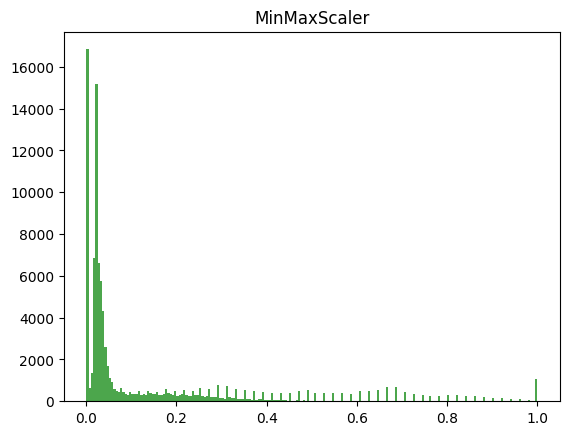

In [84]:
X_train_scaled_mms = X_train_scaled.reshape(-1,1)
plt.hist(X_train_scaled_mms, bins=200, color='green', alpha = 0.7)
plt.title('MinMaxScaler')
plt.show()

## StandardScaling (표준화; standardization)

- 종모양의 분포를 따른다고 가정하고 값들을 평균 0, 표준편차 1인 정규분포를 갖도록 변환해줌.
- 표준화를 해주면 정규화처럼 특성값의 범위가 0과 1의 범위로 균일하게 바뀌지는 않음  
- 데이터 내에 이상치가 있다면 데이터의 평균과 분산에 크게 영향을 주기 때문에 스케일링 방법으로 적절하지 않음  
- scale의 범위가 너무 크면 노이즈 데이터가 생성되거나 overfitting이 될 가능성이 높아짐

In [69]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)

xgb_reg.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(xgb_reg.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.6786


In [70]:
X_train_scaled.shape

(16512, 6)

In [71]:
X_train_scaled_ss = np.ravel(X_train_scaled)
X_train_data = np.ravel(X_train.to_numpy())

In [72]:
X_train_scaled_ss

array([ 0.18645601, -0.68818657,  0.17619144, ...,  0.2439325 ,
        0.34044198,  0.01351973])

In [73]:
X_train_scaled_ss.min(), X_train_scaled_ss.max()

(-2.2001045362097478, 108.13952776151372)

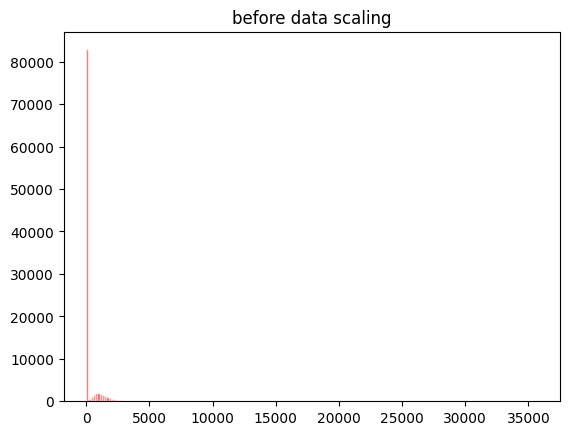

In [74]:
plt.hist(X_train_data, color= 'red', alpha = 0.7, bins=200, edgecolor ='w')
plt.title('before data scaling')
plt.show()

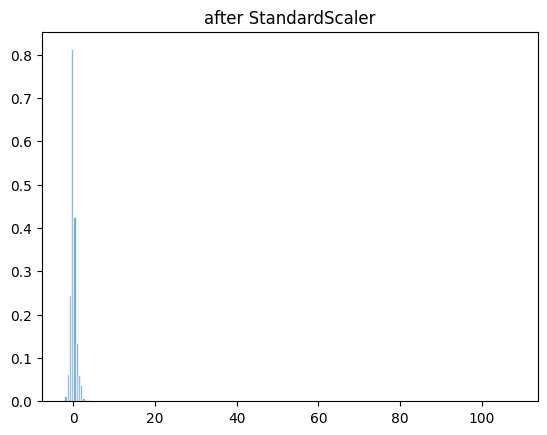

In [75]:
plt.hist(X_train_scaled_ss, bins=200, alpha = 0.7, density = True, edgecolor ='w')
plt.title('after StandardScaler')
plt.show()

## RobustScaler
- RobustScaler는 StandardScaler와 비슷함
- StandardScaler는 평균과 분산을 사용했지만 RobustScaler는 중간값(median)과 사분위값(quartile)을 사용함
- 이상치의 영향을 최소화할 수 있음

In [76]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)
xgb_reg.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(xgb_reg.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.6785


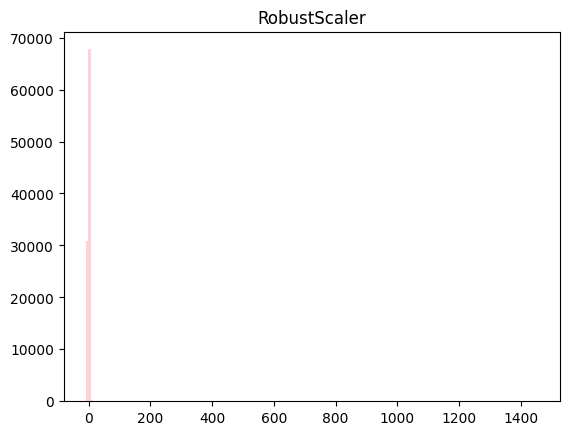

In [77]:
X_train_scaled_rbs = X_train_scaled.reshape(-1,1)
plt.hist(X_train_scaled_rbs, bins=200, color='pink', alpha = 0.7)
plt.title('RobustScaler')
plt.show()

## MaxAbsScaler¶

- MinMaxScaler와 비슷함
- 모든 피처들의 절댓값이 0과 1 사이에 놓이도록 만들어줌
- 0을 기준으로 절댓값이 가장 큰 수가 1또는 -1의 값을 가지게 됨
- 이상치의 영향을 크게 받기 때문에 이상치가 존재할 경우 이 방법은 적절하지 않음

In [79]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit(X_train)
X_train_scaled = mas.transform(X_train)
X_test_scaled = mas.transform(X_test)

xgb_reg.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(xgb_reg.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.6786


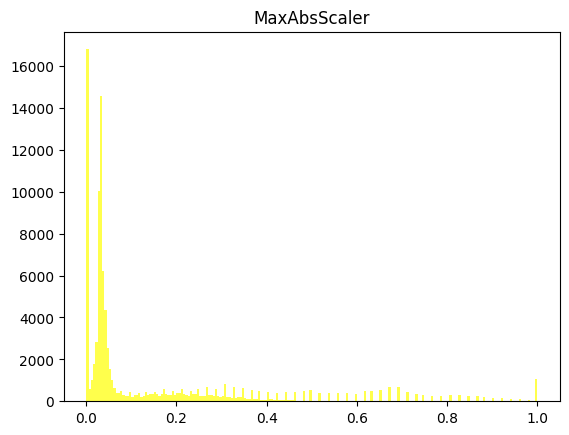

In [141]:
X_train_scaled_mas = X_train_scaled.reshape(-1,1)
plt.hist(X_train_scaled_mas, bins=200, color='yellow', alpha = 0.7)
plt.title('MaxAbsScaler')
plt.show()

## Normalizer

- 각 행(row)마다 정규화가 진행
- 한 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 데이터값을 만들어줌
- 좀 더 빠르게 학습할 수 있고 과대적합 확률을 낮출 수 있음

In [80]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_train_scaled = norm.fit_transform(X_train)
X_test_scaled = norm.transform(X_test)
xgb_reg.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(xgb_reg.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.6337


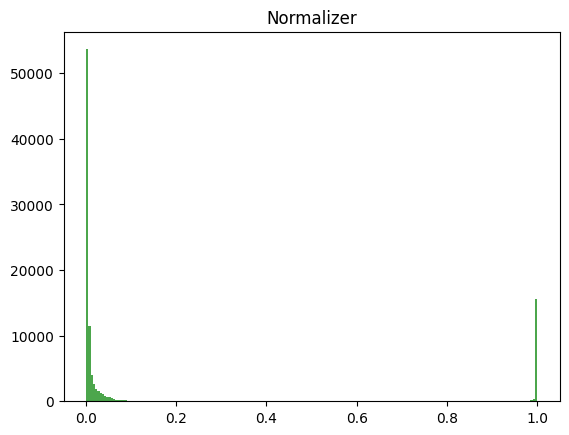

In [81]:
X_train_scaled_norm = X_train_scaled.reshape(-1, 1)
plt.hist(X_train_scaled_norm, bins=200, color='green', alpha = 0.7)
plt.title('Normalizer')
plt.show()